In [ ]:
import os
import csv
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [ ]:
with open('/gpfs01/bethge/data/openimages/annotations/train-annotations-bbox.csv', 'r') as f:
    csv_f = csv.reader(f)
    
    content = []
    for row in csv_f:
        content.append(row)

In [ ]:
with open('/gpfs01/bethge/data/openimages/annotations/class-descriptions-boxable.csv', 'r') as g:
    csv_g = csv.reader(g)
    
    class_name_list = []
    for row in csv_g:
        class_name_list.append(row)

In [ ]:
def get_boxes(im_id, im_shape):
    boxes = []
    class_ids = []
    hit = 0
    for i in range(len(content)):
        if content[i][0] == im_id:
#             print(content[i][:8])
            boxes.append(content[i][4:8])
            class_ids.append(content[i][2])
            hit = 1
        elif hit == 1:
            boxes = np.stack(boxes).astype('float32')
            break
    boxes = boxes * [im_shape[1],im_shape[1],im_shape[0],im_shape[0]]
    class_names = []
    for class_id in class_ids:
        for i in range(len(class_name_list)):
            if class_name_list[i][0] == class_id:
                class_names.append(class_name_list[i][1])
#                 print(class_name_list[i][1])
        
    return boxes, class_names

In [ ]:
import random
import colorsys
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [ ]:
from matplotlib import patches
def visualize(image, boxes, class_names):
    N = boxes.shape[0]
    _, ax = plt.subplots(1,figsize=(16,16))
    auto_show = True

    # Generate random colors
    colors = random_colors(N)

    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')

    masked_image = image.astype(np.uint32).copy()
    for i in range(N):
        color = colors[i]

        # Bounding box
        x1, x2, y1, y2 = boxes[i]
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                            alpha=0.7, linestyle="dashed",
                            edgecolor=color, facecolor='none')
        ax.add_patch(p)
        
        # Label
        class_name = class_names[i]
#         score = scores[i] if scores is not None else None
        label = class_name
#         x = random.randint(x1, (x1 + x2) // 2)
        caption = label
        ax.text(x1 + 4, y1 + 16, caption,
                color=color, size=14, backgroundcolor="none")

    ax.imshow(masked_image.astype(np.uint8))
    if auto_show:
        plt.show()

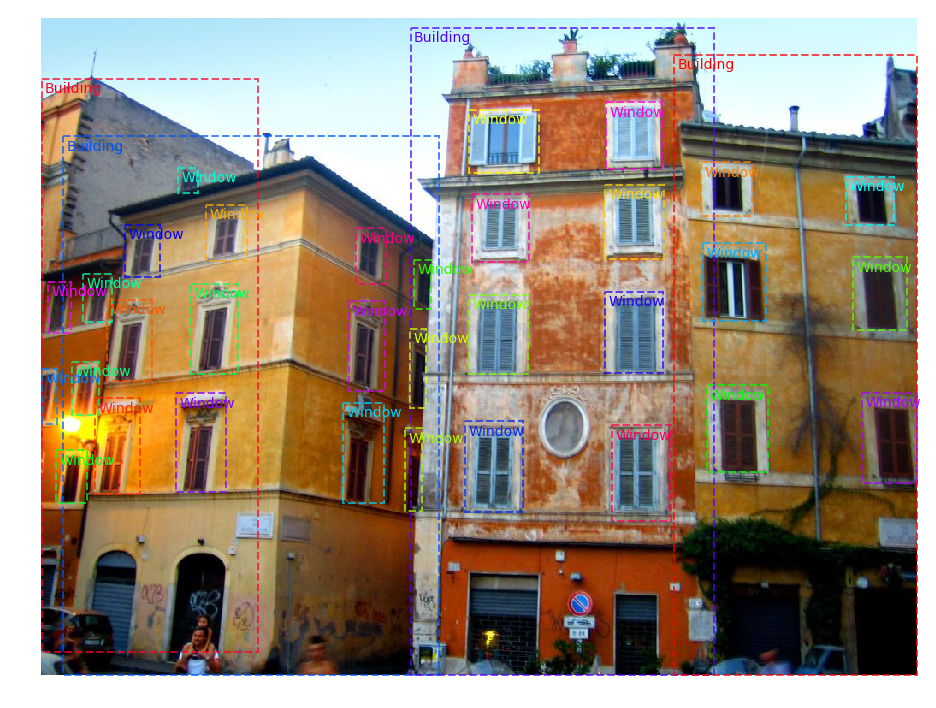

In [210]:
im_id = np.random.choice(os.listdir('/gpfs01/bethge/data/openimages/train/'))[:-4]
I = io.imread('/gpfs01/bethge/data/openimages/train/' + im_id + '.jpg')
boxes, class_names = get_boxes(im_id, I.shape)
visualize(I, boxes, class_names)